#  Predictive Analysis On Transaction Dataset

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ANZ synthesised transaction dataset.csv')

In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
data=df[["customer_id","age","txn_description","balance","amount",'gender']]

In [5]:
df_p= data.groupby(["customer_id"]).mean().reset_index()
df_p.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


In [9]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [10]:
dfta = df.groupby(['txn_description']).mean()['amount']

In [11]:
dfta

txn_description
INTER BANK      86.699461
PAY/SALARY    1898.728029
PAYMENT         77.613077
PHONE BANK     106.099010
POS             40.407412
SALES-POS       39.909789
Name: amount, dtype: float64

# Finding out the mean salary of each customer

In [12]:
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'Annual'})

In [13]:
salary.head()

,customer_id,Annual
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [14]:
annual_sal = pd.merge(df_p, salary, on="customer_id")
annual_sal.head()

,customer_id,age,balance,amount,Annual
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73


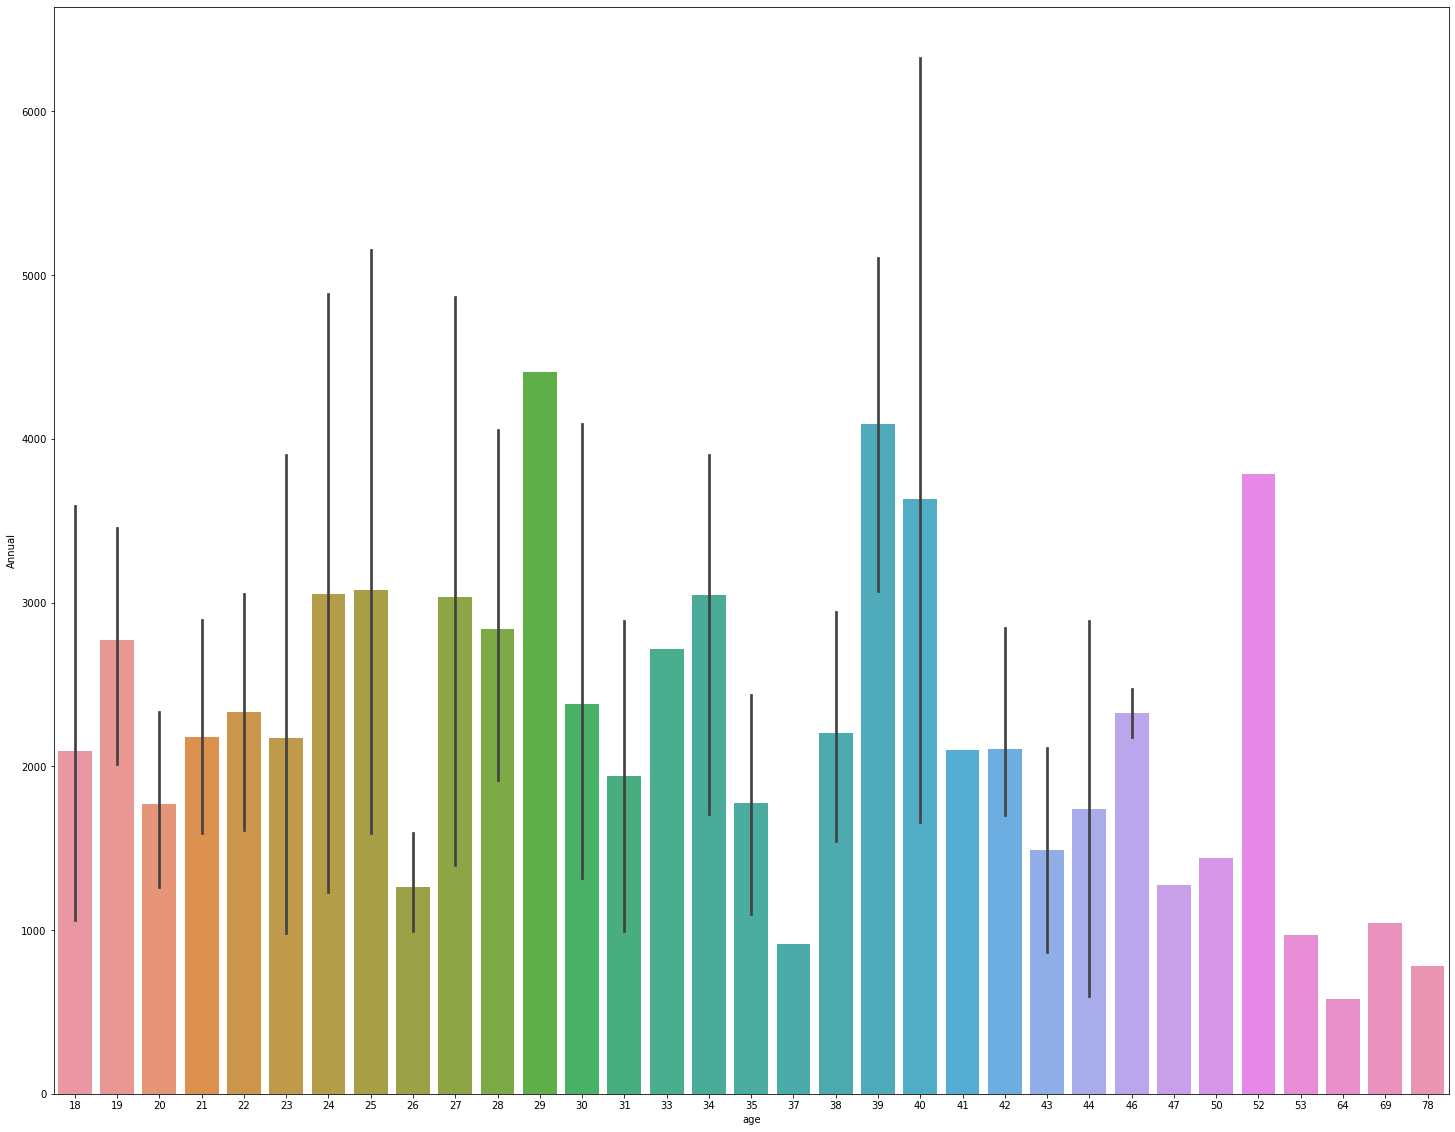

In [15]:
plt.figure(figsize=(25,20))
sns.barplot(x='age',y='Annual',data=annual_sal)

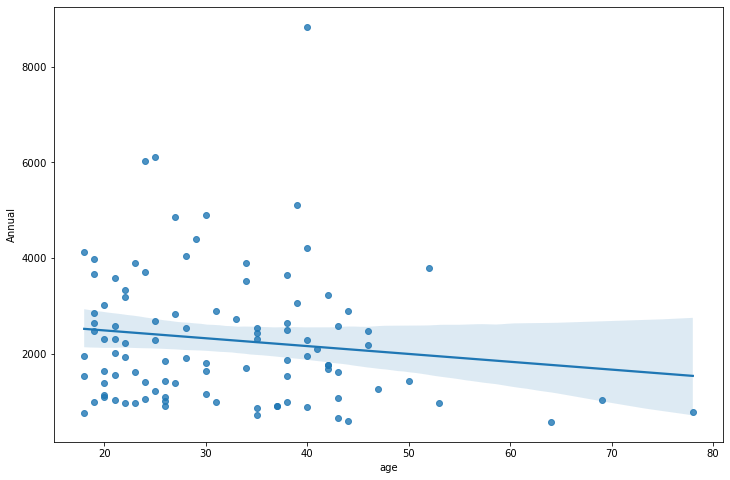

In [16]:
plt.figure(figsize=(12, 8))
sns.regplot(x='age',y='Annual',fit_reg=True,data=annual_sal)

In [17]:
sns.lmplot(x='age',y='Annual',data=annual_sal,hue='gender',markers=['o','v'],scatter_kws={'s':100},size=5)

D:\Users\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "['gender'] not in index"

In [ ]:
sns.lmplot(x='age',y='Annual',data=annual_sal,col='gender',size=5)

In [ ]:
annual_sal[['age','Annual']].corr()

****There is an negative correlation with age and salary === -0.138594. Which is fairly due to after 60 customers are retired and there is steep decrease in salary. From the scatter plot it can be concluded there is non linear relationship between age and salary.

In [ ]:
sns.barplot(x='gender',y='Annual',data=annual_sal)

**** it is clear that men's salary is higher than women .

In [ ]:
sns.heatmap(annual_sal.corr(),cmap='coolwarm',annot=True)

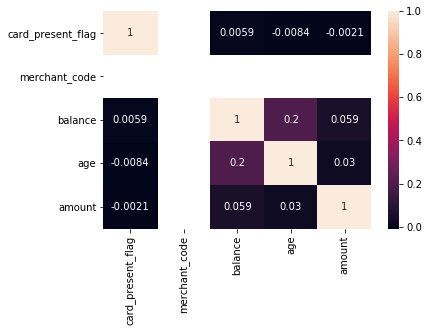

In [18]:
sns.heatmap(df.corr(),annot=True)

**Mean POS (Point of Sale) for each customer**

In [19]:
# POS indicates spending behavior of customer
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [20]:
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


**Mean payment made by the customer**

In [21]:
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [22]:
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [25]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

,customer_id,age,balance
0,CUS-1005756958,53,2275.852055
1,CUS-1117979751,21,9829.929000
2,CUS-1140341822,28,5699.212250
3,CUS-1147642491,34,9032.841186
4,CUS-1196156254,34,22272.433755


In [26]:
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

**Payment v/s AnnualSalary**

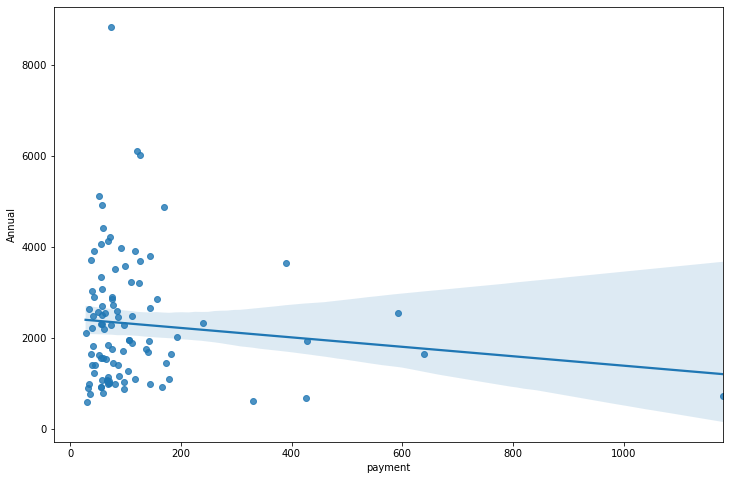

In [29]:
plt.figure(figsize=(12, 8))
sns.regplot("payment", "Annual", fit_reg=True, data=df)

**AnnualSalary vs POS**

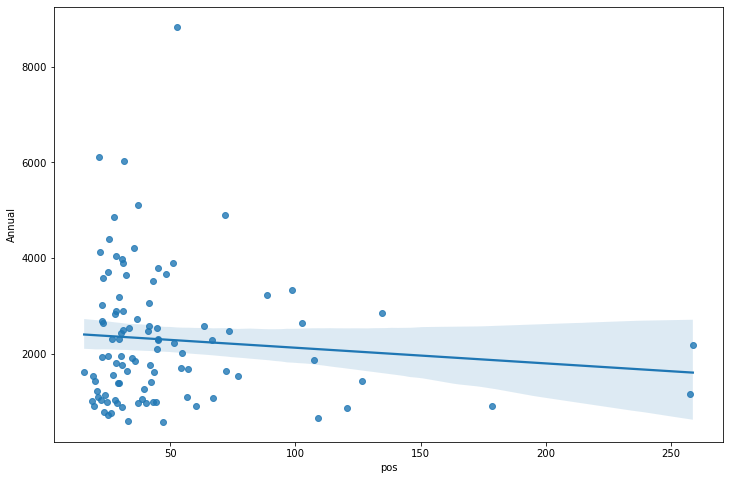

In [32]:
plt.figure(figsize=(12, 8))
sns.regplot("pos", "Annual", fit_reg=True, data=df)

# Model Building

# Training a Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [34]:
gender_numeric = {"gender":{"M": 0, "F": 1}}
df.replace(gender_numeric, inplace=True)

In [36]:
X = df[['age','payment','balance','pos']].values
y = df['Annual'].values

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [37]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and Training the Model

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lm.score(X,y)

0.11930439490077803

# Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [73]:
label_pred=lm.predict(X_test)

In [74]:
# print the intercept
print(lm.intercept_)

3154.534690478976


In [75]:
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
print('Coefficient of determination: ', r2_score(y_test, label_pred))

Coefficient of determination:  0.07666219584715916


**Residual Histogram**

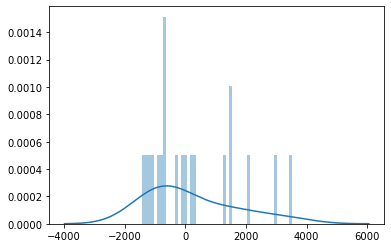

In [78]:
sns.distplot((y_test-label_pred),bins=50)

# Regression Evaluation Metrics

In [80]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, label_pred))
print('MSE:', metrics.mean_squared_error(y_test, label_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, label_pred)))

MAE: 1125.9989163311918
MSE: 2049359.2075327088
RMSE: 1431.5583144017253


In [81]:
lm.score(X_test, y_test)

0.07666219584715916

# Decision Tree - Classification and Regression

In [85]:
dt = DecisionTreeRegressor()

In [86]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [87]:
dt.predict(X_test)

array([ 917.45, 2639.76, 3517.61, 2218.73, 3071.14, 3649.51, 6107.23,
        917.45, 2280.36, 1272.47,  576.  , 2887.34, 3026.95, 2639.76,
       3676.94, 2443.24, 1099.7 , 3676.94, 4910.9 , 3517.61])

In [88]:
dt.score(X_test, y_test)

-0.57924174755527

In [89]:
print("The model predicts salary will be=")
print(dt.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
596.33
